## 3.4　CBOW モデルの実装

In [1]:
import sys
import numpy as np

In [2]:
sys.path.append('../input/deeplearningfromscratch2master/deep-learning-from-scratch-2-master')

In [3]:
from  common.util import preprocess, create_contexts_target, convert_one_hot
from common.layers import MatMul, SoftmaxWithLoss

In [4]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print('corpus')
print(corpus)
print('id_to_word')
print(id_to_word)

corpus
[0 1 2 3 4 1 5 6]
id_to_word
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [5]:
contexts, target = create_contexts_target(corpus, window_size=1)

print('contexts')
print(contexts)
print('target')
print(target)

contexts
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
target
[1 2 3 4 1 5]


In [6]:
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print('vocab_size')
print(vocab_size)
print('target')
print(target)
print('contexts')
print(contexts.shape)
print(contexts)

vocab_size
7
target
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
contexts
(6, 2, 7)
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


ミニバッチ数は 6、コンテキストは 2、one-hot ベクトルの要素数は 7 である。

In [7]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
        def forward(self, contexts, target):
            h0 = self.in_layer0.forward(contexts[:, 0])
            h1 = self.in_layer1.forward(contexts[:, 1])
            h = (h0 + h1) * 0.5
            score = self.out_layer.forward(h)
            loss = self.loss_layer.forward(score, target)
            return loss
        
        def backward(self, dout=1):
            ds = self.loss_layer.backward(dout)
            da = self.out_layer.backward(ds)
            da *= 0.5
            self.in_layer1.backward(da)
            self.in_layer0.backward(da)
            return None

### 3.4.1　学習コードの実装

In [8]:
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [9]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

In [10]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print('corpus')
print(corpus)
print('id_to_word')
print(id_to_word)

corpus
[0 1 2 3 4 1 5 6]
id_to_word
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [11]:
contexts, target = create_contexts_target(corpus, window_size=1)

print('contexts')
print(contexts)
print('target')
print(target)

contexts
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
target
[1 2 3 4 1 5]


In [12]:
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print('vocab_size')
print(vocab_size)
print('target')
print(target)
print('contexts')
print(contexts.shape)
print(contexts)

vocab_size
7
target
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
contexts
(6, 2, 7)
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

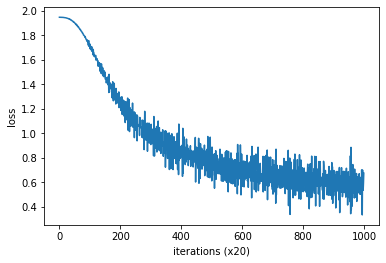

you [-1.176607   1.0956146 -1.0487052  1.3584313 -0.9502282]
say [ 1.1394131  -1.1384921   1.1486807   0.05747218  1.159698  ]
goodbye [-0.7251186   0.8184607  -0.8975186   0.57461655 -0.9737741 ]
and [ 0.8594435  -0.8736535   0.803252    1.9752389   0.89635307]
i [-0.7519294   0.80585206 -0.88812876  0.55781156 -1.0011168 ]
hello [-1.2004554  1.1012052 -1.0619594  1.3790051 -0.9322694]
. [ 1.1470929 -1.1153939  1.1296619 -1.6495552  1.1215994]


In [13]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])